In [141]:
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

% matplotlib inline

In [142]:
# the washing machine problem

dirt = ctrl.Antecedent(np.arange(0, 101), 'dirt')
grse = ctrl.Antecedent(np.arange(0, 101), 'grease')
wash = ctrl.Consequent(np.arange(0,  61), 'wash')


# membership functions
dirt.automf(3)
grse.automf(3)
wash.automf(5)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


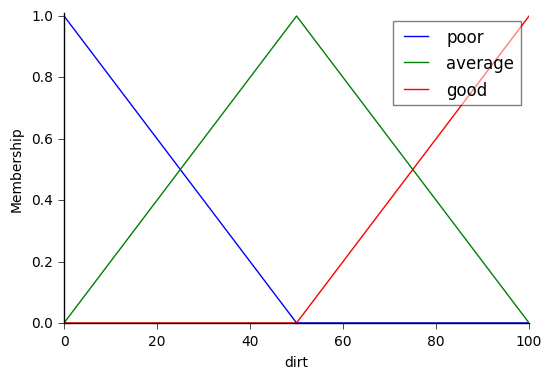

In [143]:
dirt.view()

In [144]:
grease.view()

AttributeError: 'int' object has no attribute 'view'

In [ ]:
wash.view()

In [145]:
rule    = list()
rule.append(ctrl.Rule(dirt['poor'] | grse['poor']      , wash['poor']))
rule.append(ctrl.Rule(dirt['poor'] | grse['average' ]  , wash['average']))
rule.append(ctrl.Rule(dirt['poor'] | grse['good']      , wash['decent']))
rule.append(ctrl.Rule(dirt['average'] | grse['poor']   , wash['mediocre']))
rule.append(ctrl.Rule(dirt['average'] | grse['average'], wash['average']))
rule.append(ctrl.Rule(dirt['average'] | grse['good']   , wash['decent']))
rule.append(ctrl.Rule(dirt['good'] | grse['poor']      , wash['average']))
rule.append(ctrl.Rule(dirt['good'] | grse['average']   , wash['decent']))
rule.append(ctrl.Rule(dirt['good'] | grse['good']      , wash['good']))

In [146]:
system    = ctrl.ControlSystem(rule)

In [147]:
simulator = ctrl.ControlSystemSimulation(system)

In [148]:
dirt      = 60
grease    = 70

In [149]:
simulator.input['dirt'  ] = dirt
simulator.input['grease'] = grease

In [150]:
simulator.compute()

In [151]:
washtime  = simulator.output['wash']

In [152]:
print("For " + str(dirt) + "% dirt and " + str(grease) + "% grease, it will take around " + str(np.round(washtime, 2)) + " mins wash time.")

For 60% dirt and 70% grease, it will take around 30.91 mins wash time.


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


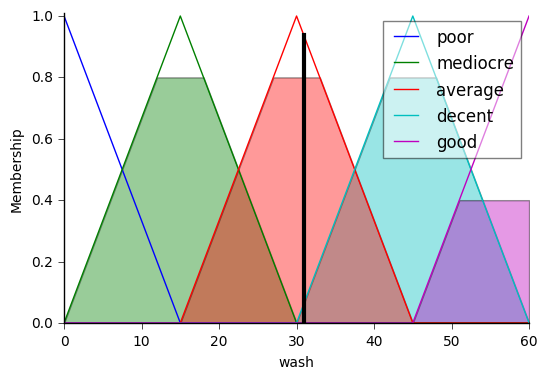

In [153]:
wash.view(sim = simulator)

In [154]:
# to view the fuzzy system in a 3D graph, let's run the simulator for 20 outputs
simulator = ctrl.ControlSystemSimulation(system, flush_after_run = (20 * 20 + 1))

In [155]:
upsampled = np.linspace(0, 100, 20)
x, y      = np.meshgrid(upsampled, upsampled)
z         = np.zeros_like(x)

for i in range(20):
    for j in range(20):
        simulator.input['dirt'  ] = x[i, j]
        simulator.input['grease'] = y[i, j]
        simulator.compute()
        
        z[i, j]                   = simulator.output['wash']        

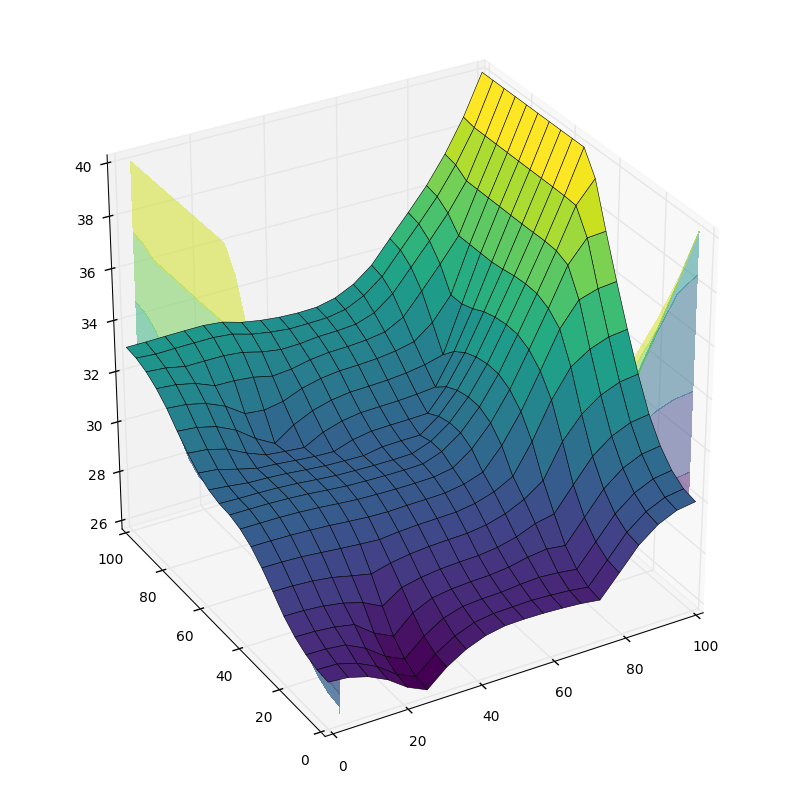

In [164]:
fig  = plt.figure(figsize = (10, 10))
ax   = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

ax.contourf(x, y, z, zdir = 'z', offset =-2.5, cmap = 'viridis', alpha = 0.5)
ax.contourf(x, y, z, zdir = 'x', offset =   3, cmap = 'viridis', alpha = 0.5)
ax.contourf(x, y, z, zdir = 'y', offset =   3, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 600)